In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ModuleNotFoundError: No module named 'tensorflow'

In [43]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

X_train.shape
# Entrainement image 32 x 32 ; 3 : rgb channels ; 50 000 : nb images train

(50000, 32, 32, 3)

In [44]:

#            --------------------  Fonctions -----------
              # plot_training_loss(fit)
              # plot_accuracy(fit)
              # plot_matrix_corr(fit,confusion_matrice,class_names)
        
# ------------------------- Pour initialiser les modèles ---------------
def plot_training_loss(fit):
    plt.plot(fit.history['loss'])
    plt.plot(fit.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training loss', 'Validation loss'], loc='upper left')
    plt.show()

# 7.a.i
def plot_accuracy(fit):
    plt.plot(fit.history['accuracy'])
    plt.plot(fit.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
    plt.show()
# 7.a.ii
def plot_matrix_corr(fit,confusion_matrice,class_names):
    sns.heatmap(conf,annot=True,fmt="d",cmap='Blues',xticklabels=class_names, yticklabels=class_names)# label=class_names)
     # labels, title and ticks
    plt.xlabel('Predicted', fontsize=12)
     #plt.set_label_position('top') 
     #plt.set_ticklabels(class_names, fontsize = 8)
     #plt.tick_top()
    plt.title("Correlation matrix")
    plt.ylabel('True', fontsize=12)
     #plt.set_ticklabels(class_names, fontsize = 8)
    plt.show()

In [60]:
#            --------------------  Fonctions -----------
              # plot_training_loss_save(fit)
              # plot_accuracy_save(fit)
              # plot_matrix_corr_save(fit,confusion_matrice,class_names)

#                 ----------  Pour lancer les models sauvegardés --------------
def plot_training_loss_save(history):
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training loss', 'Validation loss'], loc='upper left')
    plt.show()

def plot_accuracy_save(history):
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
    plt.show()

def plot_matrix_corr_save(history,confusion_matrice,class_names):
    sns.heatmap(conf,annot=True,fmt="d",cmap='Blues',xticklabels=class_names, yticklabels=class_names)# label=class_names)
     # labels, title and ticks
    plt.xlabel('Predicted', fontsize=12)
     #plt.set_label_position('top') 
     #plt.set_ticklabels(class_names, fontsize = 8)
     #plt.tick_top()
    plt.title("Correlation matrix")
    plt.ylabel('True', fontsize=12)
     #plt.set_ticklabels(class_names, fontsize = 8)
    plt.show()

In [45]:
#                  -----      <!> A généraliser sur les modèles  -----
# epoch_final = 100    +  


In [46]:
X_test.shape
# Test image 32 x 32 ; 3 : rgb channels ; 10 000 : nb images test

(10000, 32, 32, 3)

In [47]:
X_train[0]; # 3 dimensional array
y_train.shape

(50000, 1)

In [48]:
#y_train.shape  50 000 sample 1 dimensional array
# 6 <-> frog ; 9 <-> truck ; 4 <-> deer ; 1 <-> automobile

# 5 premiers éléments y_train[:5]
# on remarque que chq élément est imbriqué dans un array exemple :  [[6],[9],...] et non [6,9,...] 

# il faut pour cela redimensionner via reshape(-1,) pour 1 dim array
y_train=y_train.reshape(-1,)

y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [49]:
# classe 10 éléments 0 à 9
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [50]:
classes[9]

'truck'

In [51]:
def plot_sample(X,y, index):
# redim taille image
    plt.figure(figsize = (15,2))
# voir à quoi ressemble une image
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

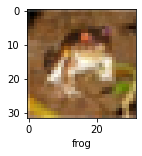

In [52]:
plot_sample(X_train,y_train,0)

# plot_sample(X_train,y_train,1)

In [53]:
# Normalizer data
X_train = X_train/255
X_test = X_test/255

In [28]:
# Construisons le modèle ANN (Artificial neural network)

# input image 32 x 32 x 3
#  2 deep layers : 1rst deep layer with 3000 neurons, 2nd deep layer 1000 neurons avc fct relu
# Last layer : 10 neurons avec fct sigmoid <-> 10 categories de notre classes 'classes'

# sigmoïd <-> s(z_k) = 1/ (1+ e^(-z_k))

ann = models.Sequential(
[
    layers.Flatten(input_shape= (32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

# 7.b.2
# Optimizer SGD <-> Gradient stochastique  ;   fct de perte = entropie croisée parsemé par catégorie
# Mesure <-> precision

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# on entraine les neurons
# 7.b.4 <=> epochs = 5
fit_ann=ann.fit(X_train,y_train, epochs=5, validation_data=(X_test,y_test))



# accuracy faible 49.5% sur samples train ;    loss : 1.4320


Epoch 1/5
1563/1563 [==============================] - 170s 108ms/step - loss: 1.8110 - accuracy: 0.3540 - val_loss: 1.6815 - val_accuracy: 0.4106
Epoch 2/5
1563/1563 [==============================] - 170s 109ms/step - loss: 1.6214 - accuracy: 0.4243 - val_loss: 1.5723 - val_accuracy: 0.4407
Epoch 3/5
1563/1563 [==============================] - 169s 108ms/step - loss: 1.5376 - accuracy: 0.4580 - val_loss: 1.6379 - val_accuracy: 0.4187
Epoch 4/5
1563/1563 [==============================] - 169s 108ms/step - loss: 1.4779 - accuracy: 0.4786 - val_loss: 1.5052 - val_accuracy: 0.4646
Epoch 5/5
1563/1563 [==============================] - 170s 109ms/step - loss: 1.4303 - accuracy: 0.4958 - val_loss: 1.5147 - val_accuracy: 0.4663


In [55]:
import pickle

# sauvegarder notre modèle ANN_Model_1.h5
ann.save('ANN_Model_1.h5')
# on sauvegarde le modèle.fit
with open('ANN_Model_1_fit', 'wb') as file_pi:
    pickle.dump(fit_ann.history, file_pi)

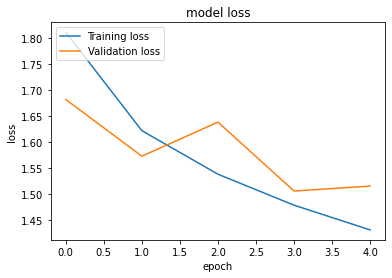

In [62]:
# relancer le model_1 ANN directement ici
from keras.models import load_model

# ouvrir via pickle
history = pickle.load(open('ANN_Model_1_fit',"rb"))


#ann_model_1 = load_model('ANN_Model_1.h5')

#fit_ann_2 = ann_model_1.fit(X_train,y_train, epochs=5, validation_data=(X_test,y_test))

# <!> utiliser plot training_loss_save
plot_training_loss_save(history)



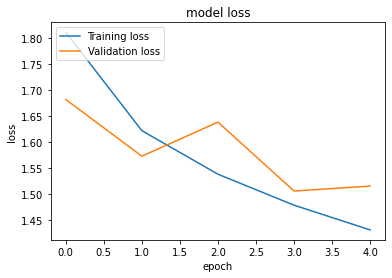

In [32]:
plot_training_loss(fit_ann)


In [1]:
 
plot_training_loss(ann_model_1)

NameError: name 'plot_training_loss' is not defined

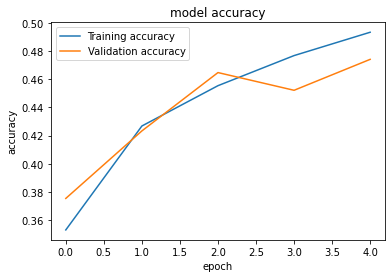

In [29]:
plot_accuracy(fit_ann)

In [41]:
# Evaluons notre modèle sur les données test
ann.evaluate(X_test, y_test)
# accuracy : 46 % => performance mauvaise

#ANN : Artificial Neural Network 
#=> Trop de calcul , traite pixel locaux comme des pixels à  part entière

#Grosse image 1920 x 1080 x 3
#=> 6 x 10^(6) first layer neurones enormes


313/313 [==============================] - 11s 34ms/step - loss: 161.6317 - accuracy: 0.46411s


[161.63174438476562, 0.4641000032424927]

In [42]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred =ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

# 
# Recal = TruePositives / (TruePositives + FalseNegatives)
# hausse Recal => minimise faux négatif

# Mesure F = (2 * Précision * Rappel) / (Précision + Rappel)
# Mesure F ~ 0 => precision + rappel médiocre
# Mesure F1 ~ 1 => précision + rappel excellent

# Precision = TruePositives / (TruePositives + FalsePositives)
# hausse Precision => minimise faux positif

# Classification report ANN

print("Classfication Report \n", classification_report( y_test, y_pred_classes))

Classfication Report 
               precision    recall  f1-score   support

           0       0.19      0.92      0.31      1000
           1       0.23      0.34      0.27      1000
           2       0.20      0.41      0.27      1000
           3       0.20      0.28      0.23      1000
           4       0.29      0.04      0.08      1000
           5       0.06      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.57      0.00      0.01      1000
           8       0.00      0.00      0.00      1000
           9       1.00      0.00      0.00      1000

    accuracy                           0.20     10000
   macro avg       0.27      0.20      0.12     10000
weighted avg       0.27      0.20      0.12     10000



C:\Users\antho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


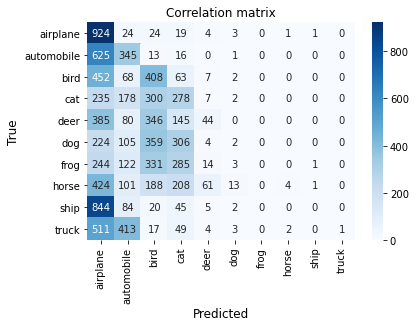

In [45]:
conf=confusion_matrix(y_test,y_pred_classes)

plot_matrix_corr (fit_ann,conf,classes)

In [60]:
# CNN <-> Feature Extraction + Classification

# Feature Extraction <-> (1) Convolution + Relu (oreille,yeux) -> (2) Pooling  -> (3) Convo + Relu(head,..)
# -> (4) Pooling  .. flatten
# Classification <-> Is it this category ?

# softmax <-> s(k)= e^(z_k)/ sum(e^(z_i),{i=1..n})
# relu <-> r(z_k) = max(z_k,0)

cnn = models.Sequential(
[
    #cnn
    
    # (1) Convolution + Relu
    # filters = 32 <=> on peut détecter 32 zones différentes sur l'image
    # kernel_size <=> taille du filtre ici 3 x 3
    layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    
    # (2) Pooling ici on choisit MaxPooling
    layers.MaxPooling2D((2,2)),
    
    # (3) + (4)
    layers.Conv2D(filters=64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax') 
])

In [61]:
# Optimizer adam <=> optimization algorithm 
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [62]:
# Entrainons model cnn
fit_cnn = cnn.fit(X_train, y_train, epochs = 10,validation_data=(X_test,y_test));

# accuracy  train :  ~ 0.78

Epoch 1/10
1563/1563 [==============================] - 101s 64ms/step - loss: 1.4257 - accuracy: 0.4905 - val_loss: 1.1710 - val_accuracy: 0.5876
Epoch 2/10
1563/1563 [==============================] - 5185s 3s/step - loss: 1.0813 - accuracy: 0.6225 - val_loss: 1.0241 - val_accuracy: 0.6454
Epoch 3/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.9555 - accuracy: 0.6669 - val_loss: 0.9828 - val_accuracy: 0.6594
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8673 - accuracy: 0.6975 - val_loss: 0.9512 - val_accuracy: 0.6736
Epoch 5/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.7968 - accuracy: 0.7251 - val_loss: 0.8829 - val_accuracy: 0.7012
Epoch 6/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.7339 - accuracy: 0.7464 - val_loss: 0.8840 - val_accuracy: 0.6975
Epoch 7/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.6797 - accuracy: 0.7634 - val_loss: 0.89

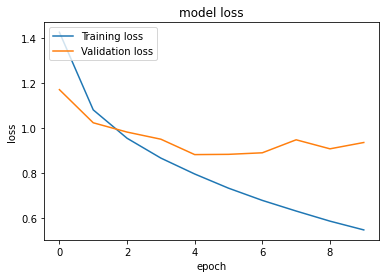

In [63]:
plot_training_loss(fit_cnn)

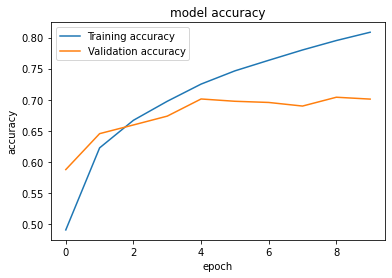

In [64]:
plot_accuracy(fit_cnn)

In [65]:
cnn.evaluate(X_test, y_test)
# accuracy ~ 70% => bonne précision

313/313 [==============================] - 7s 22ms/step - loss: 0.9366 - accuracy: 0.7010 


[0.9365729689598083, 0.7009999752044678]

In [66]:
y_test= y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [67]:
# Prediction model cnn
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[9.4529130e-03, 3.2102130e-02, 7.6213910e-04, 7.8484529e-01,
        5.4604381e-05, 7.6700039e-02, 3.3464271e-03, 2.2405693e-06,
        9.2549920e-02, 1.8421267e-04],
       [3.6986903e-04, 2.4443752e-01, 3.3639704e-08, 6.1131409e-08,
        3.5049380e-10, 8.2652507e-10, 1.5759538e-09, 7.6596757e-11,
        7.5453216e-01, 6.6027843e-04],
       [5.9295189e-02, 3.6187956e-01, 9.7787031e-04, 1.4678481e-03,
        2.1826314e-04, 8.5084808e-05, 1.4908929e-04, 6.2427879e-04,
        5.7109684e-01, 4.2059389e-03],
       [9.4908756e-01, 6.4396481e-03, 9.6467445e-03, 1.6249652e-03,
        2.3552367e-02, 1.4625753e-04, 1.5088399e-04, 2.9440766e-04,
        9.0450784e-03, 1.2088499e-05],
       [1.7004586e-05, 5.2836335e-06, 4.1171361e-02, 1.2630135e-01,
        3.4769341e-01, 3.1028641e-02, 4.5327407e-01, 2.3286475e-06,
        5.0536986e-04, 1.1222727e-06]], dtype=float32)

In [70]:
np.argmax([12,34,67,1,2,88]) # donne l'index de la cellule où le nb est maximum

5

In [71]:
np.argmax(y_pred[0])

3

In [72]:
y_classes = [np.argmax(element) for element in y_pred]

In [73]:
# comparons 15 premières valeurs de y_pred (cnn) avec y_test pour voir ci la prediction s'effectue assez bien
y_classes[:15]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9]

In [74]:
y_test[:15]


array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9], dtype=uint8)

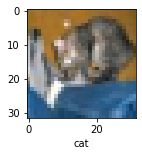

In [75]:
# visualiser la comparaison  pour voir les difficultés d'apprentissage
plot_sample(X_test,y_test,0)

In [76]:
classes[y_classes[0]]

'cat'

In [77]:
# Classification CNN
print("Classification report: \n", classification_report(y_test, y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      1000
           1       0.76      0.88      0.81      1000
           2       0.57      0.63      0.60      1000
           3       0.51      0.56      0.53      1000
           4       0.71      0.60      0.65      1000
           5       0.60      0.60      0.60      1000
           6       0.81      0.73      0.77      1000
           7       0.80      0.70      0.75      1000
           8       0.80      0.78      0.79      1000
           9       0.81      0.74      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



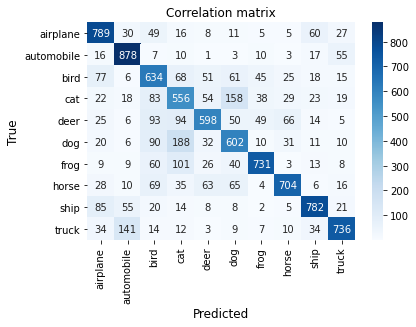

In [78]:

conf=confusion_matrix(y_test,y_classes)

plot_matrix_corr (fit_cnn,conf,classes)

In [ ]:
#
# 
#           ------ Essayons d'améliorer le modèle ANN en changeant les params   ----



In [13]:
# Construisons le modèle ANN_V2

# input image 32 x 32 x 3
#  2 deep layers : 1rst deep layer with 3000 neurons, 2nd deep layer 1000 neurons avc fct relu
# Last layer : 10 neurons avec fct sigmoid <-> 10 categories de notre classes 'classes'

# sigmoïd <-> s(z_k) = 1/ (1+ e^(-z_k))

ann_v2 = models.Sequential(
[
    layers.Flatten(input_shape= (32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

# 7.b.2
# Optimizer Adam <-> Gradient stochastique  ;   fct de perte = entropie croisée parsemé par catégorie
# Mesure <-> precision

ann_v2.compile(optimizer='Adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# on entraine les neurons
# 7.b.4 <=> epochs = 5
fit_ann_v2=ann_v2.fit(X_train,y_train, epochs=5, validation_data=(X_test,y_test))

# accuracy faible 49.5% sur samples train ;    loss : 1.4320


Epoch 1/5
1563/1563 [==============================] - 209s 133ms/step - loss: 1.8899 - accuracy: 0.3276 - val_loss: 1.6771 - val_accuracy: 0.4009
Epoch 2/5
1563/1563 [==============================] - 205s 131ms/step - loss: 1.6546 - accuracy: 0.4065 - val_loss: 1.6148 - val_accuracy: 0.4155
Epoch 3/5
1563/1563 [==============================] - 204s 131ms/step - loss: 1.5728 - accuracy: 0.4354 - val_loss: 1.6118 - val_accuracy: 0.4341
Epoch 4/5
1563/1563 [==============================] - 207s 133ms/step - loss: 1.5238 - accuracy: 0.4554 - val_loss: 1.5290 - val_accuracy: 0.4523
Epoch 5/5
1563/1563 [==============================] - 206s 132ms/step - loss: 1.4824 - accuracy: 0.4709 - val_loss: 1.5010 - val_accuracy: 0.4649


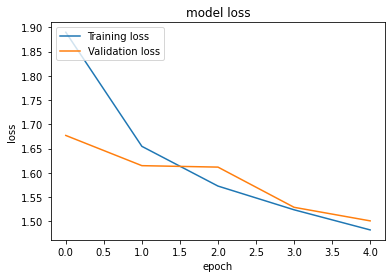

In [14]:
plot_training_loss(fit_ann_v2)

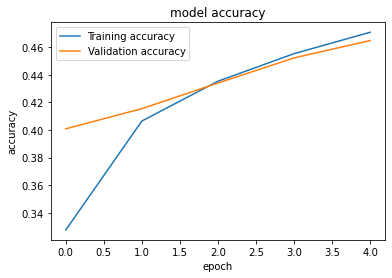

In [15]:
plot_accuracy(fit_ann_v2)

In [ ]:
# Evaluons notre modèle sur les données test
ann_v2.evaluate(X_test, y_test)
# accuracy : 46 % => performance mauvaise

#ANN : Artificial Neural Network 
#=> Trop de calcul , traite pixel locaux comme des pixels à  part entière

#Grosse image 1920 x 1080 x 3
#=> 6 x 10^(6) first layer neurones enormes


In [ ]:
# Evaluons notre modèle sur les données test
ann_v2.evaluate(X_test, y_test)
# accuracy : 46 % => performance mauvaise

#ANN : Artificial Neural Network 
#=> Trop de calcul , traite pixel locaux comme des pixels à  part entière

#Grosse image 1920 x 1080 x 3
#=> 6 x 10^(6) first layer neurones enormes


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred =ann_v2.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

# 
# Recal = TruePositives / (TruePositives + FalseNegatives)
# hausse Recal => minimise faux négatif

# Mesure F = (2 * Précision * Rappel) / (Précision + Rappel)
# Mesure F ~ 0 => precision + rappel médiocre
# Mesure F1 ~ 1 => précision + rappel excellent

# Precision = TruePositives / (TruePositives + FalsePositives)
# hausse Precision => minimise faux positif

# Classification report ANN

print("Classfication Report \n", classification_report( y_test, y_pred_classes))

In [ ]:
conf=confusion_matrix(y_test,y_pred_classes)

plot_matrix_corr (fit_ann_v2,conf,classes)

In [ ]:

#      -------  Model 2 CNN (cnn_v2) ------


In [ ]:
# CNN <-> Feature Extraction + Classification

# Feature Extraction <-> (1) Convolution + Relu (oreille,yeux) -> (2) Pooling  -> (3) Convo + Relu(head,..)
# -> (4) Pooling  .. flatten
# Classification <-> Is it this category ?

# softmax <-> s(k)= e^(z_k)/ sum(e^(z_i),{i=1..n})
# relu <-> r(z_k) = max(z_k,0)

cnn_v2 = models.Sequential(
[
    #cnn
    
    # (1) Convolution + Relu
    # filters = 32 <=> on peut détecter 32 zones différentes sur l'image
    # kernel_size <=> taille du filtre ici 3 x 3
    layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    
    # (2) Pooling ici on choisit MaxPooling
    layers.MaxPooling2D((2,2)),
    
    # (3) + (4)
    layers.Conv2D(filters=64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax') 
])

In [ ]:
# Optimizer adam <=> optimization algorithm 
cnn_v2.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
# Entrainons model cnn
fit_cnn_v2 = cnn_v2.fit(X_train, y_train, epochs = 10,validation_data=(X_test,y_test));

# accuracy  train :  ~ 0.78

In [ ]:
# sauvegarder notre modèle CNN_Model_2.h5
cnn_v2.save('CNN_Model_2.h5')

In [ ]:
# relancer le model_2 CNN directement ici
# cnn_model_2 = load_model('CNN_Model_2.h5')


In [ ]:
#             ------------- Evaluer à partir de la sauvegarde    -------------

# plot_training_loss(fit_cnn_model_2)
        
# plot_accuracy(fit_cnn_model_2)

# cnn_model_2.evaluate(X_test, y_test)


In [ ]:
# ------------------------ Grid Search --------------------------------

# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
    ###################################################################################################################################
	# create model
	#cnn => caractértistiques modéles (TODO)
    model = models.Sequential(
    [layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')])
	# Compile model
    cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
	return model
#########################################################################################################################################
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset => deja fait X_train X_test y_train y_test
X = X_train+X_test
Y= y_train+y_test
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 40, 100]
epochs = [10, 50, 100]
optimizer = ['Adam','SGD']
learn_rate =[0.001,0.1,0.3]
param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer, learn_rate=learn_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))